In [74]:
# Dependencies and Setup
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import timedelta
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

In [75]:
# Name of the CSV file
file = 'Historical Interest Rate Data/Historical Interest Rate Data - 1990 - 2022.xlsx'

ir_df = pd.read_excel(file, sheet_name ='Sheet1', index_col=0, dtype={'Effective Date':'datetime64[ns]', 'Cash Rate Target': float})

peaks_date = ["1994-07-27","1999-10-05","2006-04-04","2007-07-03","2009-09-02"]
timepoint = [0,30,60,90,120,150,180]

date_lst = []
timepoint_lst = []
nopeaks_lst = []
peaks_lst = []

# counter
i = 1

for dt in peaks_date:
    startdate = datetime.strptime(dt, '%Y-%m-%d')
    for t in range(len(timepoint)):
        if timepoint[t] == 0:
            enddate = startdate 
        else: enddate = startdate + timedelta(days=timepoint[t])
        #Make sure dates doesn't land on Weekends
        if enddate.weekday() > 4:
            #print(enddate)
            if enddate.weekday() == 5:
                enddate = enddate + timedelta(days=3)
            else: enddate = enddate + timedelta(days=2)
        
        peaks_lst.append(enddate)
        timepoint_lst.append(timepoint[t])
        nopeaks_lst.append(i)
        t += 1
    i += 1

# Dataframe of dates of interest and it's corresponding peaks
peaks_df = pd.DataFrame({'Peak':nopeaks_lst,'Timepoint': timepoint_lst,'Date': peaks_lst})
peaks_df.head(7)


,Peak,Timepoint,Date
0,1,0,1994-07-27
1,1,30,1994-08-26
2,1,60,1994-09-27
3,1,90,1994-10-25
4,1,120,1994-11-24
5,1,150,1994-12-27
6,1,180,1995-01-23


In [76]:
# Using Pandas grouping to group the data by Peaks
peaks_grouped = peaks_df.groupby('Peak')
# Get series of the first value of the group index
startdt_lst = peaks_grouped['Date'].first()
# Get series of the Last value of the group index
enddt_lst =  peaks_grouped['Date'].last()

In [77]:
# Create a function to make a mask
def Inbetween_(start_date, end_date):
    mask = (ir_df.index > start_date) & (ir_df.index <= end_date)
    return mask 

# Data Splice to different group
Peak_1 = ir_df[Inbetween_(startdt_lst.values[0],enddt_lst.values[0])]
Peak_2 = ir_df[Inbetween_(startdt_lst.values[1],enddt_lst.values[1])]
Peak_3 = ir_df[Inbetween_(startdt_lst.values[2],enddt_lst.values[2])]
Peak_4 = ir_df[Inbetween_(startdt_lst.values[3],enddt_lst.values[3])]
Peak_5 = ir_df[Inbetween_(startdt_lst.values[4],enddt_lst.values[4])]


In [78]:
#GETTING ASX STOCK DATA
# We would like all available data from 01/01/2000 until 12/31/2016.
start_date = '1991-01-01'
end_date = '2021-12-31'

# User pandas_reader.data.DataReader to load the desired data. As simple as that.
panel_data = data.DataReader('^AXJO', 'yahoo', start_date, end_date)

# Create a function to make a mask
def Inbetween_(start_date, end_date,df):
    mask = (df.index > start_date) & (df.index <= end_date)
    return mask 

# Data Splice to different group
Stock_Peak_1 = panel_data[Inbetween_(startdt_lst.values[0],enddt_lst.values[0],panel_data)]
Stock_Peak_2 = panel_data[Inbetween_(startdt_lst.values[1],enddt_lst.values[1],panel_data)]
Stock_Peak_3 = panel_data[Inbetween_(startdt_lst.values[2],enddt_lst.values[2],panel_data)]
Stock_Peak_4 = panel_data[Inbetween_(startdt_lst.values[3],enddt_lst.values[3],panel_data)]
Stock_Peak_5 = panel_data[Inbetween_(startdt_lst.values[4],enddt_lst.values[4],panel_data)]

# Save plot 
panel_data.to_csv('panel_data.csv')

# Put everything in the list for easy access
IR_peak_lst = [Peak_1,Peak_2,Peak_3,Peak_4,Peak_5]
ASX_peak_lst = [Stock_Peak_1,Stock_Peak_2,Stock_Peak_3,Stock_Peak_4,Stock_Peak_5]

In [79]:
ASXpeaks_df = peaks_df

close_price = []
i = 0
j = 1

for dt_ in ASXpeaks_df['Date']: 
    #print(dt_)
    try: 
        price_ = panel_data['Close'][panel_data.index == dt_].values[0]
    except:
        price_ = 0
        if price_ == 0: 
            for j in range(7):
                try:
                    price_ = panel_data['Close'][panel_data.index == (dt_ + timedelta(days=j))].values[0]
                    #print(dt_ + timedelta(days=j))
                except:
                    price_ = 0
                
                if price_ != 0:
                    price_ = price_
                    break
            j += 1
    
    #print(price_)
    close_price.append(price_)

#print(len(ASXpeaks_df['Date']), len(close_price))

ASXpeaks_df['ASX'] = close_price




#a = panel_data['Close'][panel_data.index == '1992-11-22']
#a.values[0]

#panel_data['Close'][panel_data.index == ASXpeaks_df['Date'][0]].values[0]

In [80]:
# Formula % difference 
def d_percentage(new,old):
    try:
        d_percentage = ((new - old) /old) 
    except:
        d_percentage = 0
    return d_percentage

old_price_peak = ASXpeaks_df.loc[ASXpeaks_df['Timepoint'] == 0].reset_index()

#old_price_peak['ASX'].values[0]

i = 0
j = 1
change = []

for price in ASXpeaks_df['ASX']:
    #print(ASXpeaks_df['Peak'].values[i])
    if ASXpeaks_df['Peak'].values[i] == 1:
        a = d_percentage(price,old_price_peak['ASX'].values[0])
    elif ASXpeaks_df['Peak'].values[i] == 2:
        a = d_percentage(price,old_price_peak['ASX'].values[1])
    elif ASXpeaks_df['Peak'].values[i] == 3:
        a = d_percentage(price,old_price_peak['ASX'].values[2])
    elif ASXpeaks_df['Peak'].values[i] == 4:
        a = d_percentage(price,old_price_peak['ASX'].values[3])
    elif ASXpeaks_df['Peak'].values[i] == 5:
        a = d_percentage(price,old_price_peak['ASX'].values[4])
    change.append(a)
    i += 1

#Creates a new column 
ASXpeaks_df['Percentage Change'] = change
ASXpeaks_df1 = ASXpeaks_df


In [81]:
ASXpeaks_df1

,Peak,Timepoint,Date,ASX,Percentage Change
0,1,0,1994-07-27,1982.199951,0.000000
1,1,30,1994-08-26,2021.599976,0.019877
2,1,60,1994-09-27,1952.300049,-0.015084
3,1,90,1994-10-25,1956.599976,-0.012915
4,1,120,1994-11-24,1854.199951,-0.064575
5,1,150,1994-12-27,1884.000000,-0.049541
6,1,180,1995-01-23,1813.400024,-0.085158
7,2,0,1999-10-05,2854.600098,0.000000
8,2,30,1999-11-04,2864.600098,0.003503
9,2,60,1999-12-07,3053.000000,0.069502


In [82]:
#ASXpeaks_df1["Percentage Change"] = ASXpeaks_df1["Percentage Change"].astype(float).map("{:,.2%}".format)
#ASXpeaks_df1["ASX"] = ASXpeaks_df1["ASX"].astype(float).map("{:,.2f}".format)
#ASXpeaks_df1

The correlation coefficient between the Time Period and Percentage Change is 0.19


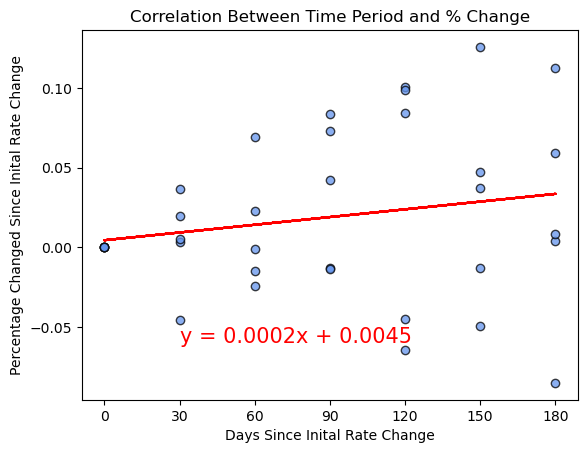

In [83]:
# # #---------------
# # Calculate the linear regression
x_values = ASXpeaks_df1['Timepoint']
y_values = ASXpeaks_df1['Percentage Change']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

# Plot the data
plt.scatter(x_values,y_values, marker="o", facecolors="cornflowerblue", edgecolors="black", alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.xticks(ticks=[0, 30, 60, 90, 120, 150, 180])
plt.annotate(line_eq,(30,-0.06),fontsize=15,color="red")
plt.xlabel("Days Since Inital Rate Change")
plt.ylabel("Percentage Changed Since Inital Rate Change")
plt.title("Correlation Between Time Period and % Change")
plt.savefig("PyPlot_Scatter - Correlation.png");

# Calculate and print the correlation coefficent 
print(f"The correlation coefficient between the Time Period and Percentage Change is {round(st.pearsonr(ASXpeaks_df1['Timepoint'],ASXpeaks_df1['Percentage Change'])[0],2)}")

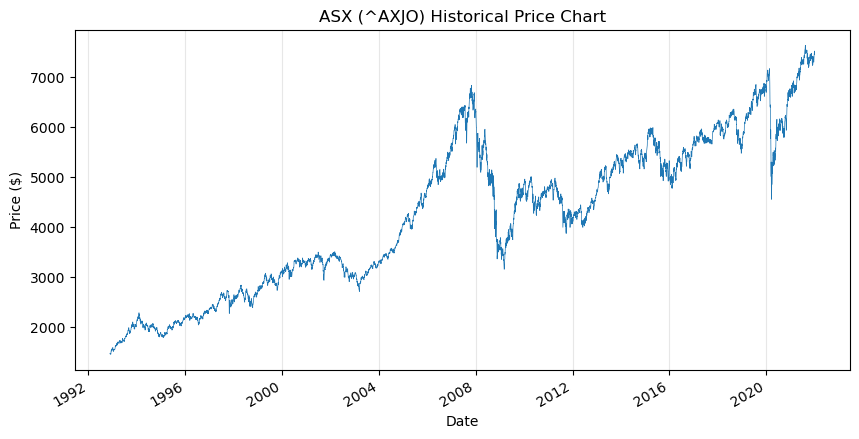

In [84]:
# Plot ASX Data
ax = panel_data['Close'].plot(figsize=(10, 5), use_index=True, ylabel='Price ($)',lw=0.5)
ax.set_title('ASX (^AXJO) Historical Price Chart')
ax.grid(axis='x', alpha=0.3)
fig = ax.get_figure()
fig.savefig("ASX CHART")

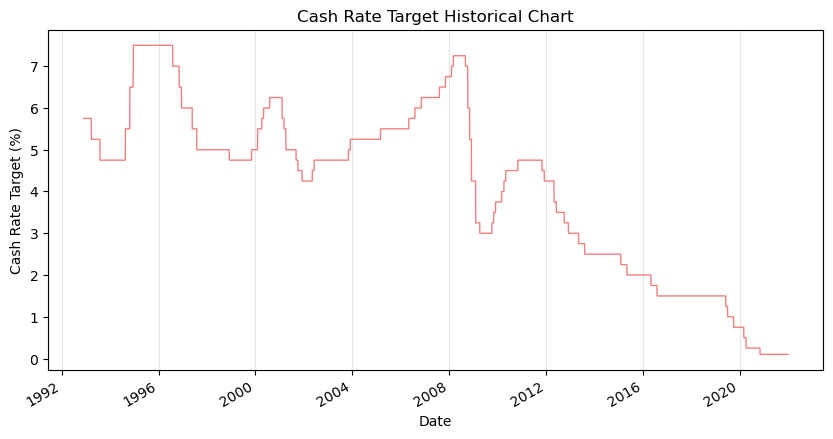

In [85]:
# Plot Interest Rate Data
ax = ir_df.plot(label='Cash',color = 'lightcoral', lw=1)
ax.set_title('Cash Rate Target Historical Chart')
ax.set_ylabel('Cash Rate Target (%)')
ax.set_xlabel('Date')
ax.get_legend().remove()
ax.grid(axis='x', alpha=0.3)
fig = ax.get_figure()
fig.set_size_inches(10,5)
fig.savefig("IR CHART")

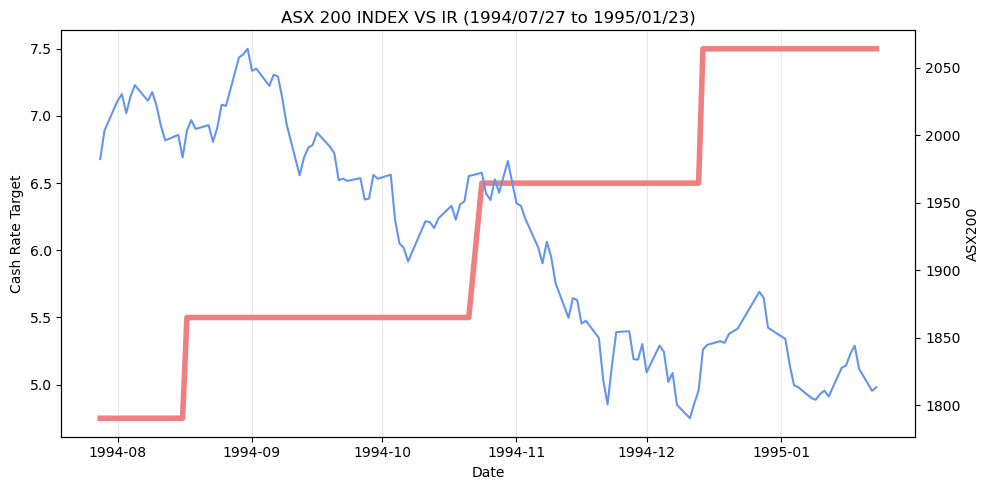

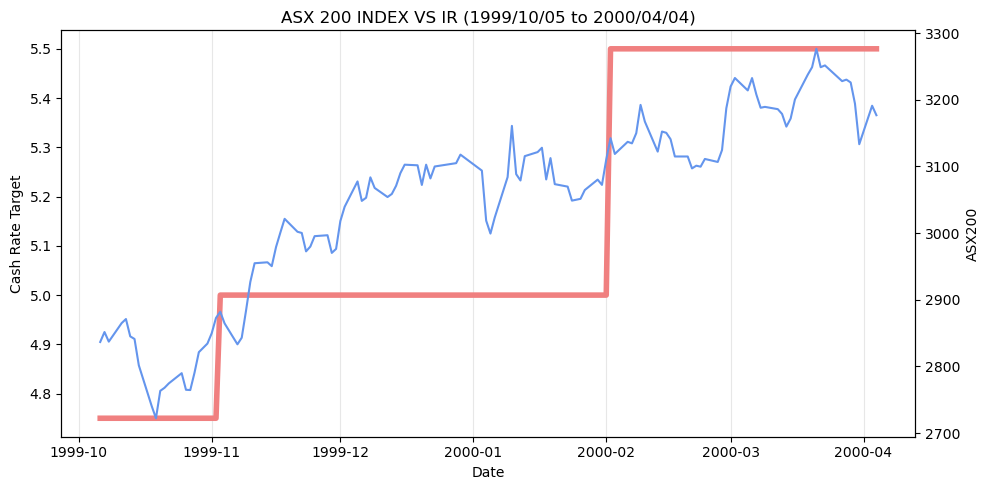

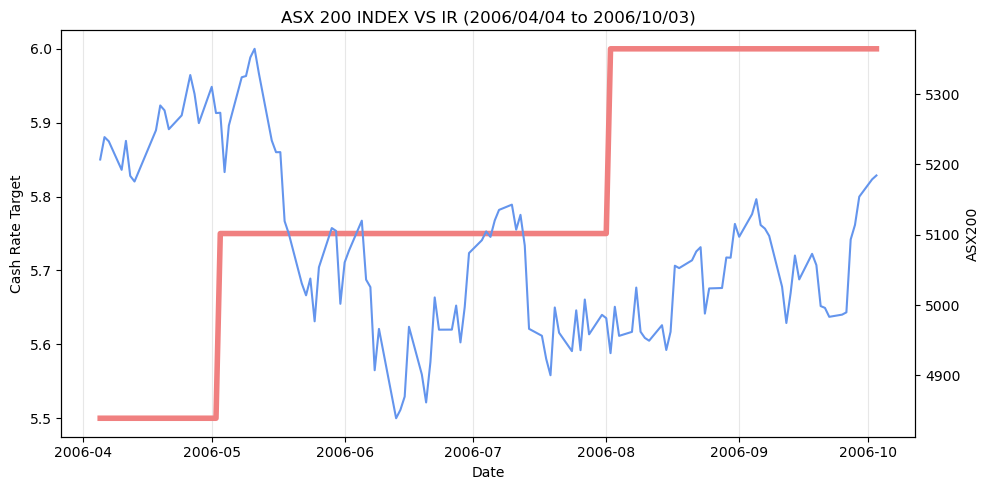

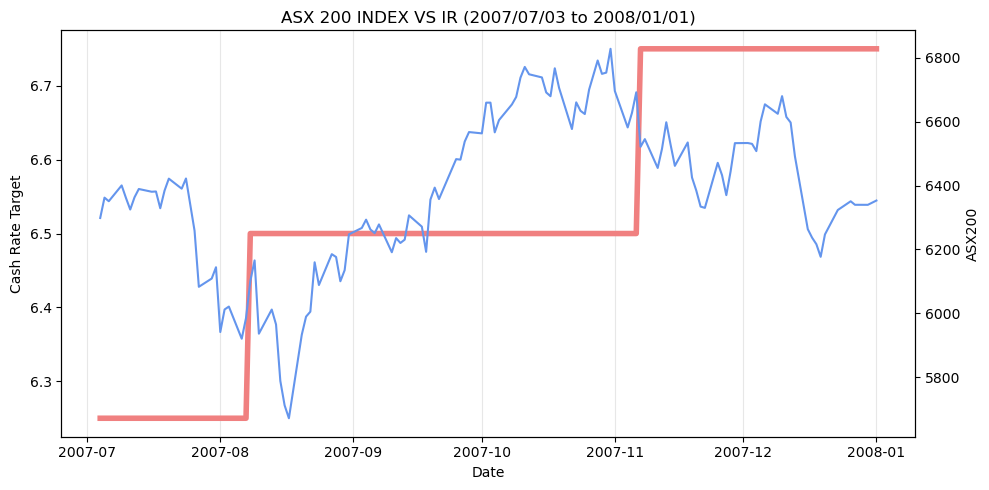

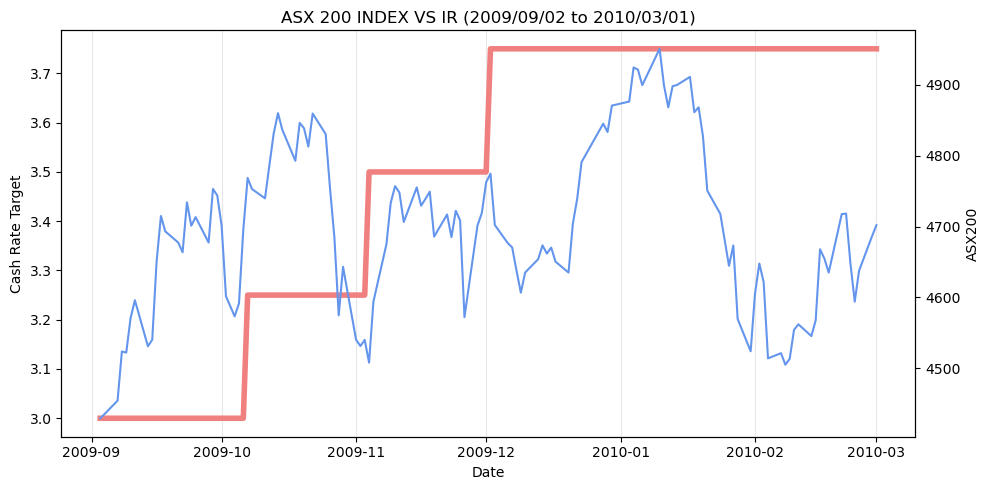

In [86]:
# Defien a function to plot similar charts
def plot_peaks(df_IR,df_peak,i):
    
    #Start Date and End date
    end_date = pd.to_datetime(enddt_lst.values[i])
    end_date = end_date.strftime('%Y/%m/%d')
   
    start_date = pd.to_datetime(startdt_lst.values[i])
    start_date = start_date.strftime('%Y/%m/%d')

    plt.style.use('default')

    fig, ax1 = plt.subplots()

    ax1.plot(df_IR, color = 'lightcoral', lw=4)
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Cash Rate Target')
    ax1.tick_params(axis='y')
    ax1.grid(axis='x', alpha=0.3)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.plot(df_peak['Close'], color ='cornflowerblue')
    ax2.set_ylabel('ASX200')  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    # ax2.set_ylim([2500, 7500])

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    fig.set_size_inches(10,5)
    plt.title(f"ASX 200 INDEX VS IR ({start_date} to {end_date})")
    plt.tight_layout()
    #plt.subplots_adjust(top=0.88)

    plt.savefig(f"Chart {i}.png")

#Define Counter
i = 0

# Iterate through the peaks we have chosen, to get charts
for i in range(len(IR_peak_lst)):
    plot_peaks(IR_peak_lst[i],ASX_peak_lst[i],i)
    i += 1
